## Ejercicios realizados - Laboratorio 02 - Inteligencia Artificial 2025


<small>Integrantes:

1. Xavier López
2. Gerson Ramirez
3. Madeline Castro  
   </small>


In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#### Ejercicio 01

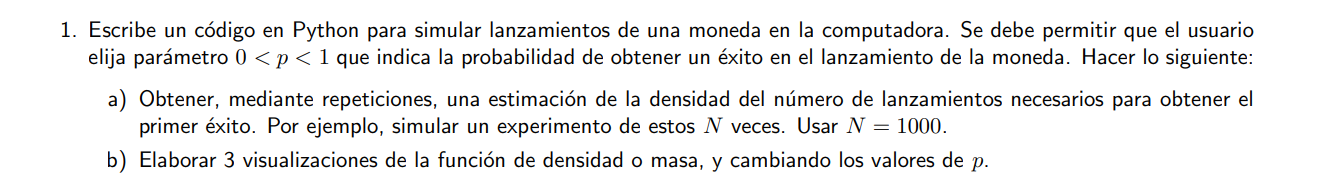


Estimación de la densidad para el primer éxito (p = 0.5)


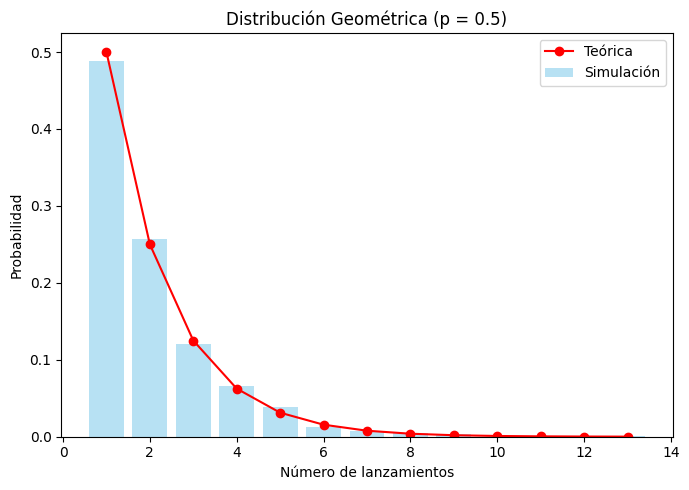

Visualización de la densidad del número de lanzamientos necesarios para obtener el primer éxito para diferentes valores de p


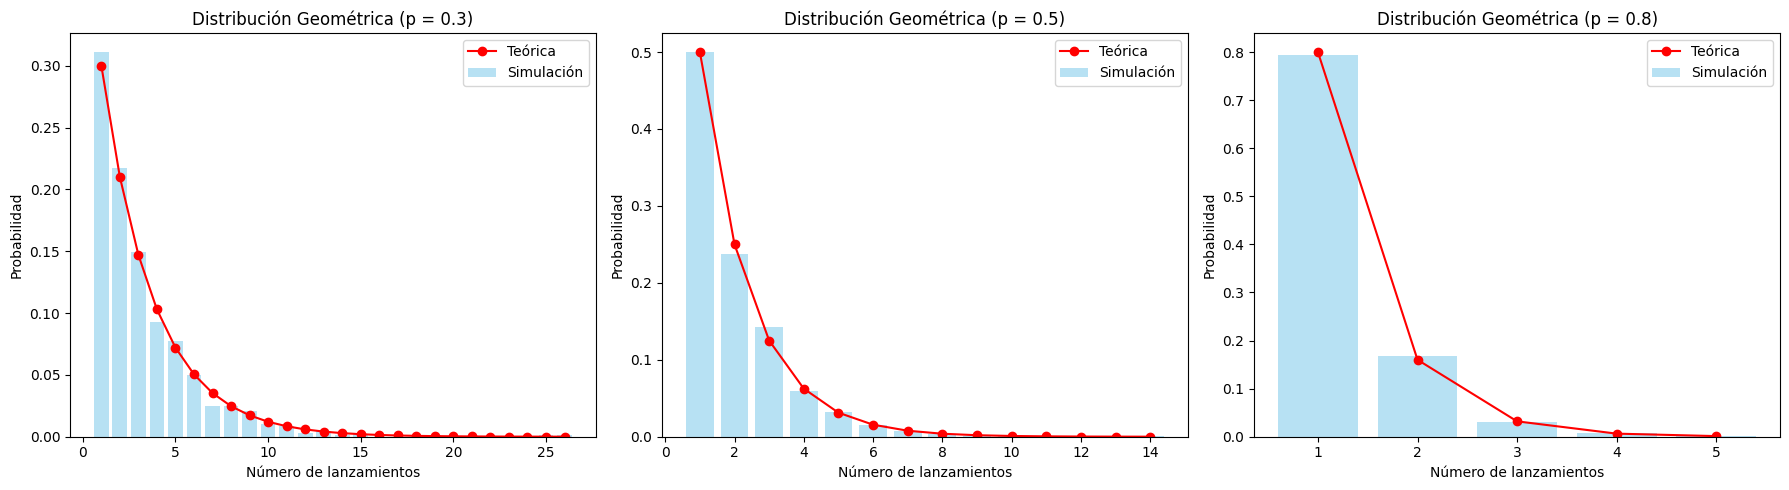

In [8]:
def simular_lanzamientos(p, N):
    """
    Simula N experimentos en los que se lanzan
    una moneda con probabilidad de éxito p hasta obtener el primer éxito.
    Devuelve una lista con el número de lanzamientos requeridos en cada experimento.
    """
    resultados = []
    for _ in range(N):
        cuenta = 0
        # Se lanza hasta obtener éxito
        while True:
            cuenta += 1 
            if random.random() < p: 
                resultados.append(cuenta) 
                break
    return resultados

def graficar_pmf(resultados, p, N, ax):
    """
    Grafica la función de masa (PMF) estimada a partir de la simulación y la PMF teórica
    de la distribución geométrica.
    """
    # Se calcula el histograma (frecuencia relativa) de los resultados
    valores, frecuencias = np.unique(resultados, return_counts=True) 
    pmf_simulada = frecuencias / N 
    
    # Gráfica de barras para la PMF simulada
    ax.bar(valores, pmf_simulada, alpha=0.6, color='skyblue', label='Simulación')
    
    # Se genera la PMF teórica de la distribución geométrica:
    # f(k) = p * (1-p)^(k-1) para k = 1, 2, 3, ..., max(resultados)
    k_vals = np.arange(1, max(valores) + 1)
    pmf_teorica = p * (1 - p) ** (k_vals - 1)
    ax.plot(k_vals, pmf_teorica, 'ro-', label='Teórica')
    
    # Configuración de la gráfica
    ax.set_xlabel("Número de lanzamientos")
    ax.set_ylabel("Probabilidad")
    ax.set_title(f"Distribución Geométrica (p = {p})")
    ax.legend()

if __name__ == '__main__':
    N = 1000  # Número de experimentos indicado en el enunciado

    # Parte a): Pedir al usuario que ingrese la probabilidad p y graficar en base a ello
    try:
        p_usuario = float(input("Ingresa la probabilidad de éxito (0 < p < 1): "))
    except ValueError:
        print("Debes ingresar un número.")
        exit()
        
    if not (0 < p_usuario < 1):
        print("El valor de p debe estar entre 0 y 1 (exclusivo).")
        exit()
    
    # Simulación para el valor de p ingresado por el usuario
    resultados_usuario = simular_lanzamientos(p_usuario, N)
    
    # Crea una figura para graficar la PMF simulada y la teórica para p ingresado
    print(f"Estimación de la densidad para el primer éxito (p = {p_usuario})")
    fig1, ax1 = plt.subplots(figsize=(7, 5)) 
    graficar_pmf(resultados_usuario, p_usuario, N, ax1) 
    plt.tight_layout() # Ajusta los elementos de la gráfica para que no se superpongan
    plt.show()
    
    # Parte b): Visualizaciones para tres valores de p diferentes
    p_valores = [0.3, 0.5, 0.8]  # Valores de p para los que se simularán los experimentos
    fig2, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, p_val in enumerate(p_valores):
        # Simula N experimentos para el valor de p correspondiente
        resultados = simular_lanzamientos(p_val, N)
        graficar_pmf(resultados, p_val, N, axes[i])
    
    print("Visualización de la densidad del número de lanzamientos necesarios para obtener el primer éxito para diferentes valores de p")
    plt.tight_layout()
    plt.show()

#### Ejercicio 02

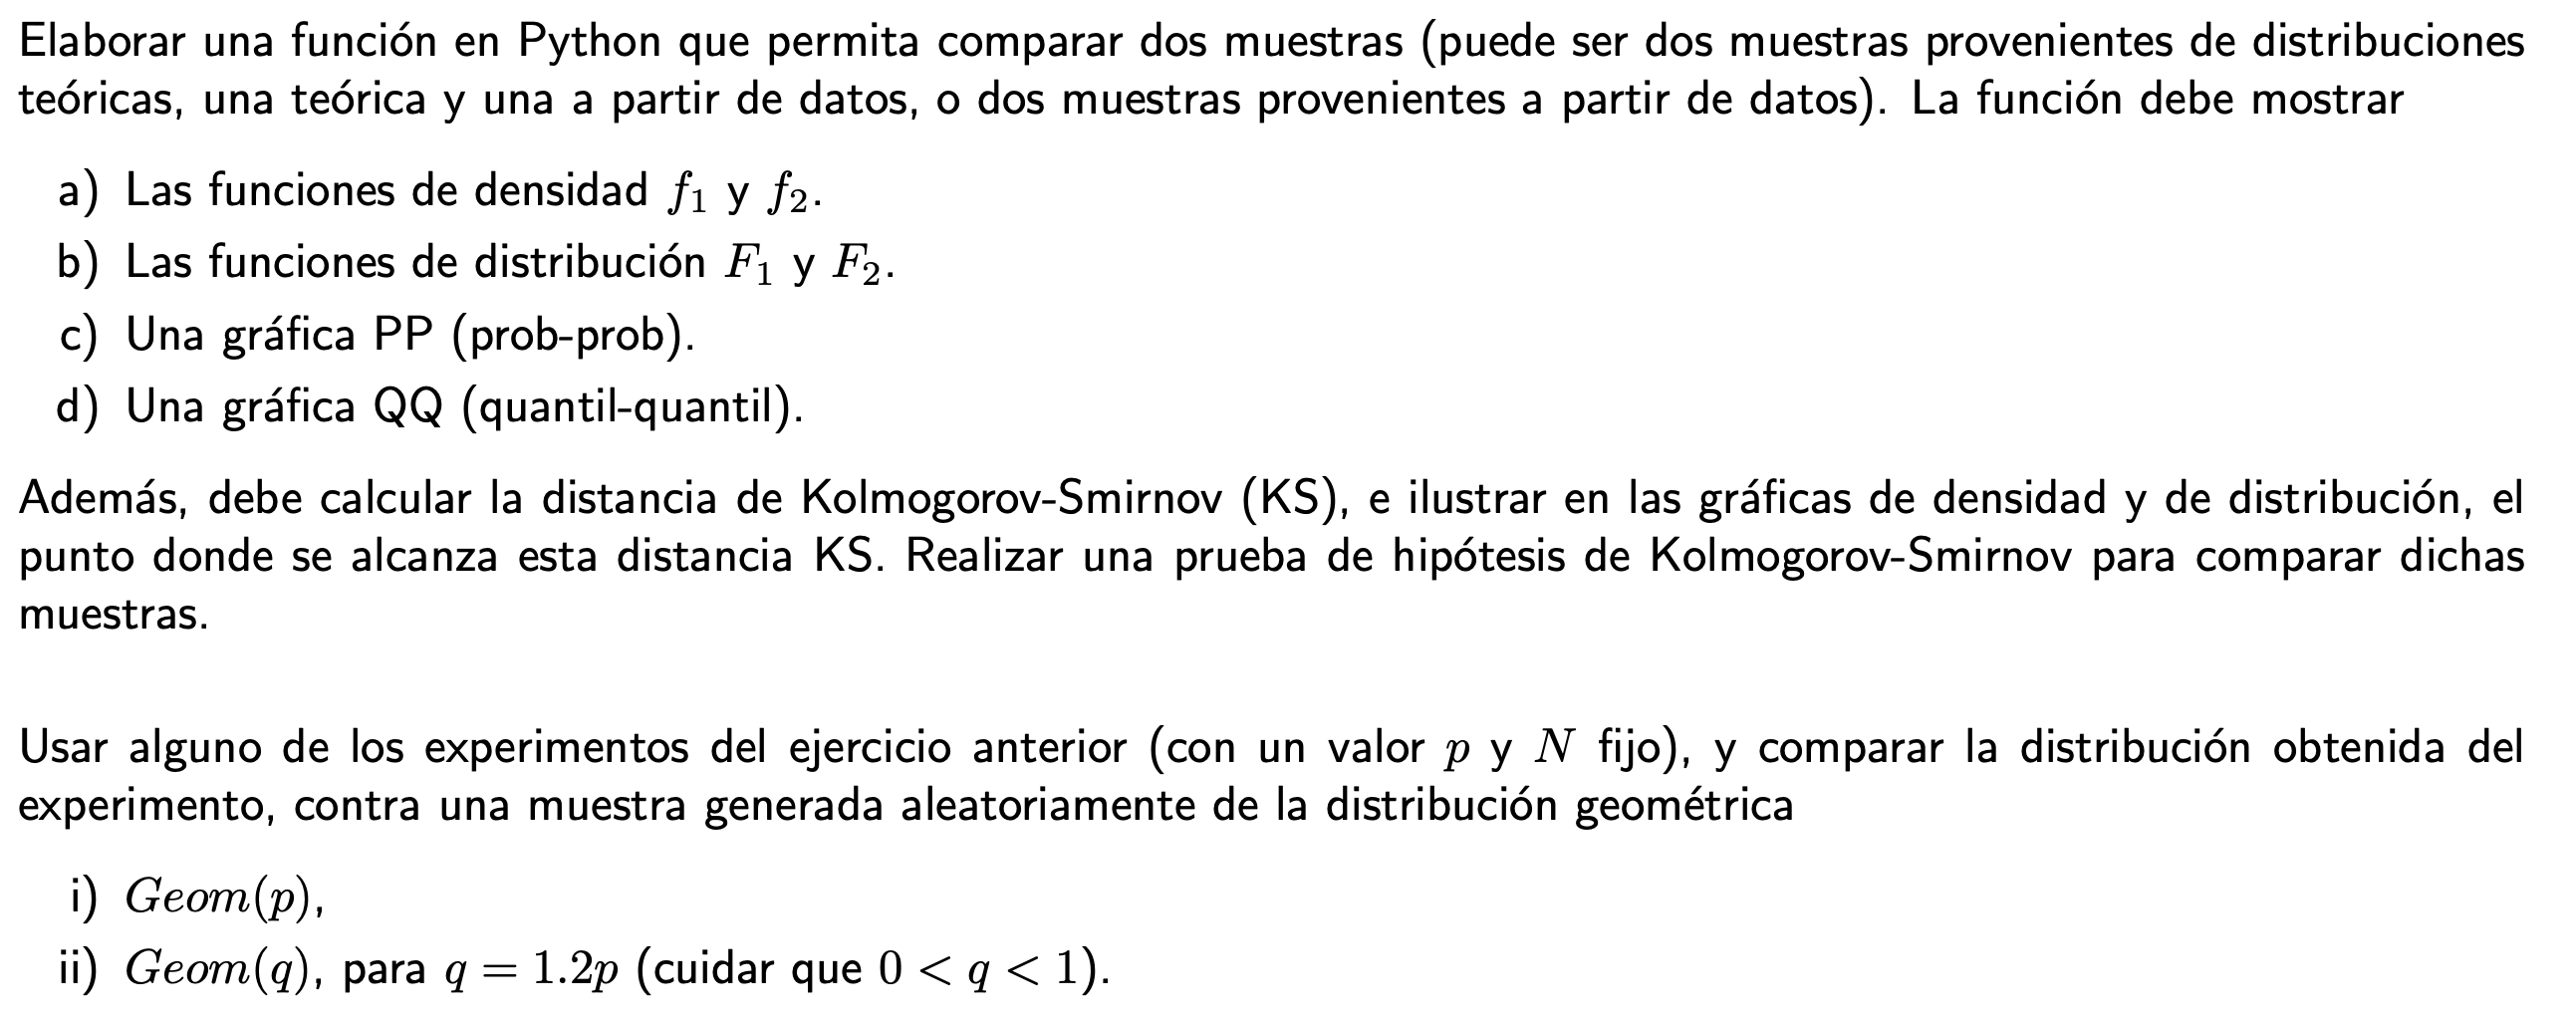

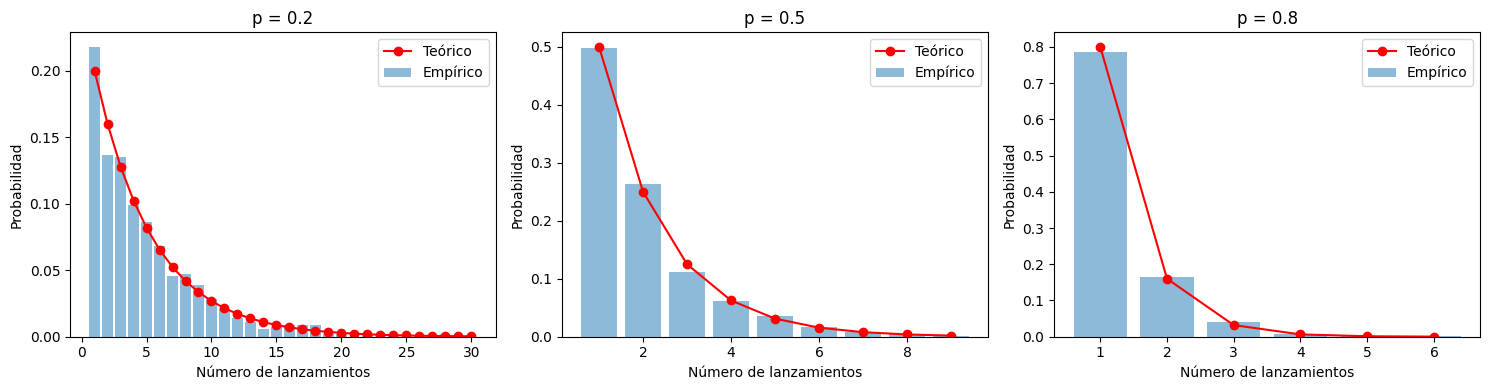

Comparación entre experimento y Geom(p):


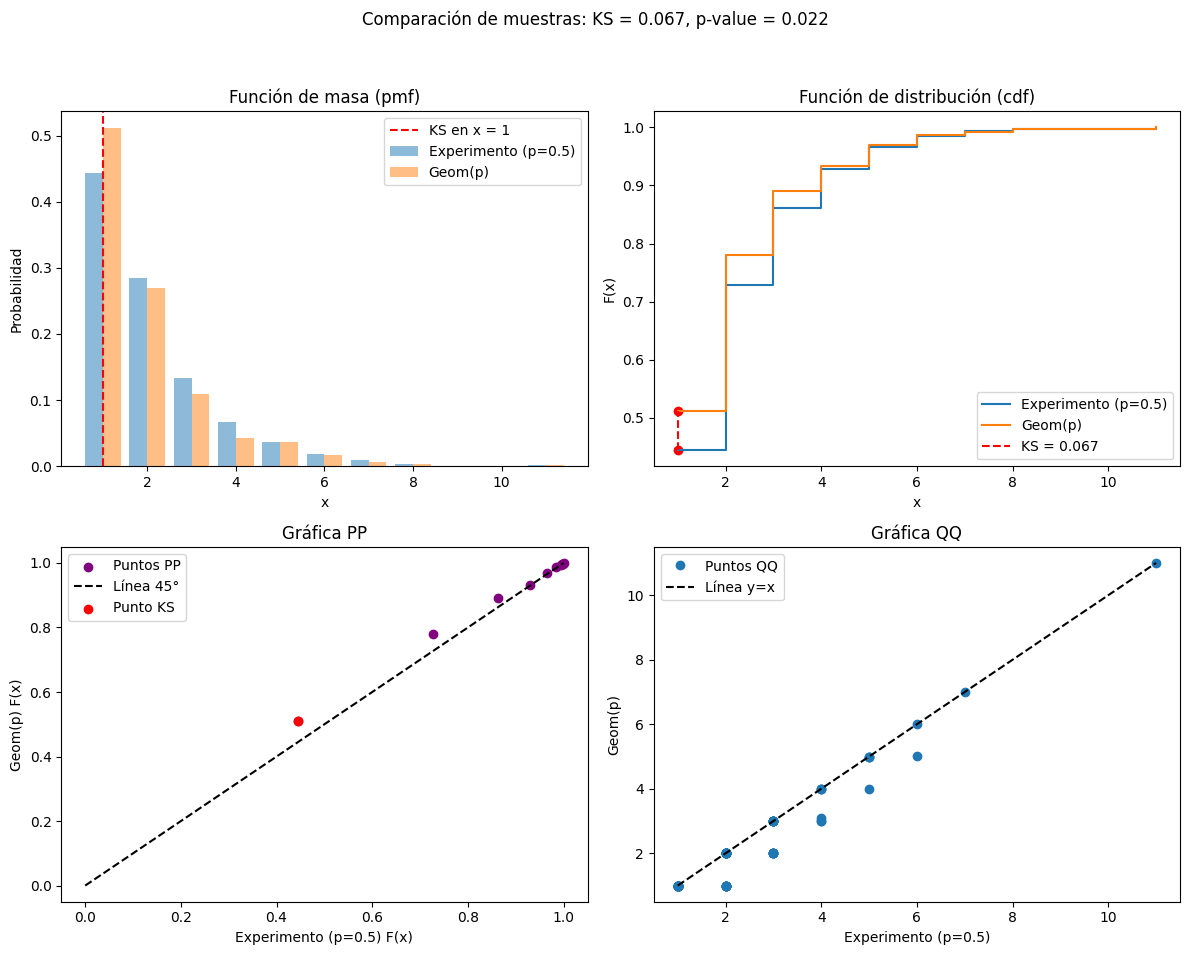

Comparación entre experimento y Geom(q):


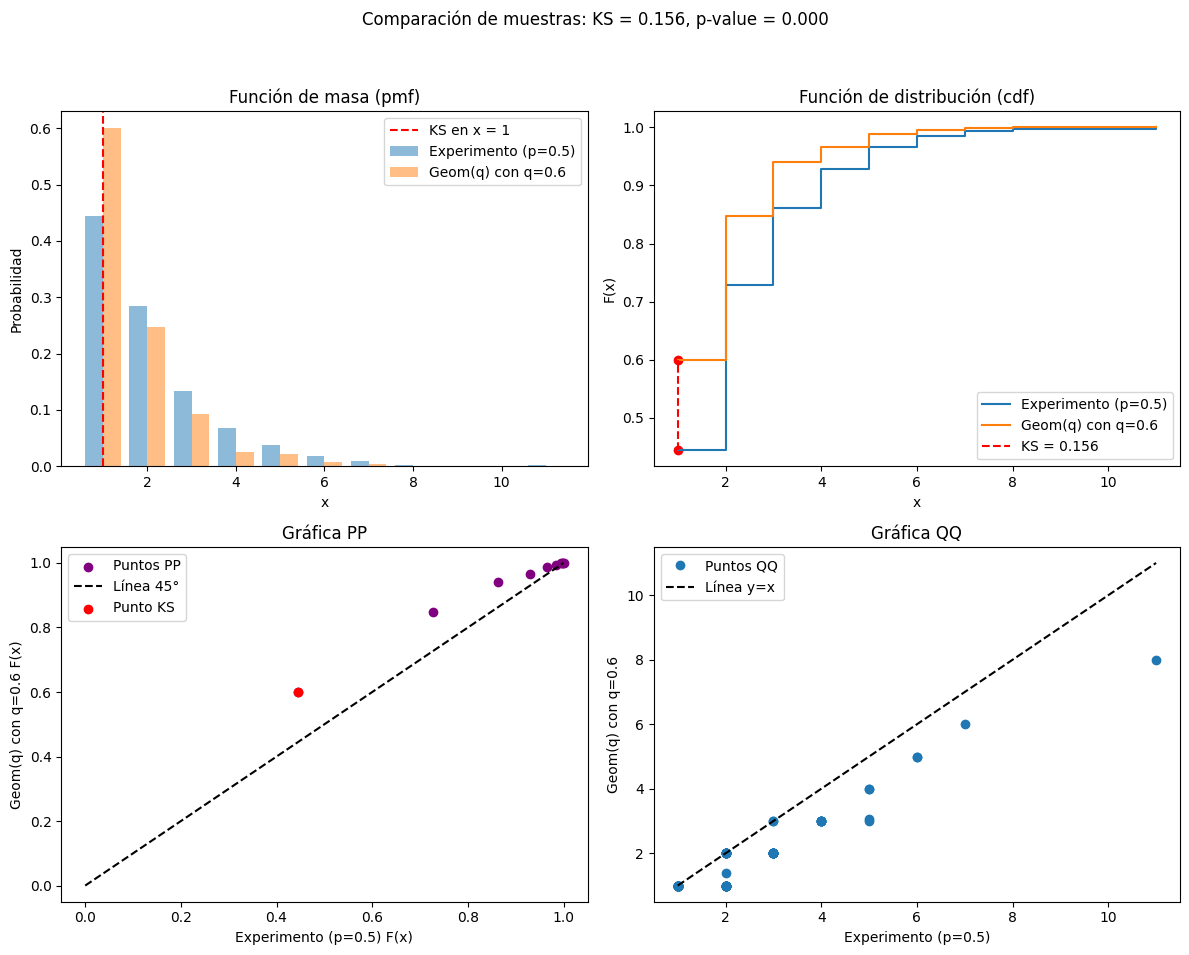

In [9]:
def comparar_muestras(muestra1, muestra2, label1="Muestra 1", label2="Muestra 2"):
    """
    Compara dos muestras mostrando:
      a) Funciones de masa (pmf)
      b) Funciones de distribución (cdf)
      c) Gráfica PP (prob-prob)
      d) Gráfica QQ (cuantil-cuantil)
      
    Además, calcula la distancia KS, marca en las gráficas el punto donde se alcanza dicha distancia,
    y realiza la prueba de hipótesis de Kolmogorov-Smirnov.
    """
    n1 = len(muestra1)
    n2 = len(muestra2)
    
    # Soporte: conjunto de valores observados en ambas muestras
    x_support = np.union1d(np.unique(muestra1), np.unique(muestra2))
    
    # Cálculo de la función de masa (pmf) empírica
    pmf1 = np.array([np.sum(muestra1 == x) for x in x_support]) / n1
    pmf2 = np.array([np.sum(muestra2 == x) for x in x_support]) / n2
    
    # Cálculo de la función de distribución (cdf) empírica
    cdf1 = np.cumsum(pmf1)
    cdf2 = np.cumsum(pmf2)
    
    # Distancia KS: diferencia máxima entre las cdf
    diff = np.abs(cdf1 - cdf2)
    ks_idx = np.argmax(diff)
    ks_val = diff[ks_idx]
    ks_x = x_support[ks_idx]
    
    # Prueba de Kolmogorov-Smirnov
    ks_stat, ks_pvalue = stats.ks_2samp(muestra1, muestra2)
    
    # Gráficas
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # a) Función de masa (pmf)
    ax = axs[0, 0]
    width = 0.4  # ancho de las barras
    ax.bar(x_support - width/2, pmf1, width=width, alpha=0.5, label=label1)
    ax.bar(x_support + width/2, pmf2, width=width, alpha=0.5, label=label2)
    ax.axvline(ks_x, color='red', linestyle='--', label=f'KS en x = {ks_x}')
    ax.set_title("Función de masa (pmf)")
    ax.set_xlabel("x")
    ax.set_ylabel("Probabilidad")
    ax.legend()
    
    # b) Función de distribución (cdf)
    ax = axs[0, 1]
    ax.step(x_support, cdf1, where='post', label=label1)
    ax.step(x_support, cdf2, where='post', label=label2)
    ax.plot([ks_x, ks_x], [cdf1[ks_idx], cdf2[ks_idx]], color='red', linestyle='--', label=f'KS = {ks_val:.3f}')
    ax.scatter([ks_x], [cdf1[ks_idx]], color='red')
    ax.scatter([ks_x], [cdf2[ks_idx]], color='red')
    ax.set_title("Función de distribución (cdf)")
    ax.set_xlabel("x")
    ax.set_ylabel("F(x)")
    ax.legend()
    
    # c) Gráfica PP (probabilidad-probabilidad)
    ax = axs[1, 0]
    ax.scatter(cdf1, cdf2, color='purple', label="Puntos PP")
    ax.plot([0, 1], [0, 1], 'k--', label="Línea 45°")
    ax.scatter([cdf1[ks_idx]], [cdf2[ks_idx]], color='red', zorder=5, label="Punto KS")
    ax.set_title("Gráfica PP")
    ax.set_xlabel(f"{label1} F(x)")
    ax.set_ylabel(f"{label2} F(x)")
    ax.legend()
    
    # d) Gráfica QQ (cuantil-cuantil)
    ax = axs[1, 1]
    # Se calculan percentiles (0 a 100)
    percentiles = np.linspace(0, 100, 101)
    q1 = np.percentile(muestra1, percentiles)
    q2 = np.percentile(muestra2, percentiles)
    ax.plot(q1, q2, 'o', label="Puntos QQ")
    min_val = min(q1.min(), q2.min())
    max_val = max(q1.max(), q2.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', label="Línea y=x")
    ax.set_title("Gráfica QQ")
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    ax.legend()
    
    plt.suptitle(f"Comparación de muestras: KS = {ks_val:.3f}, p-value = {ks_pvalue:.3f}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    

# Número de experimentos
N = 1000

# Solicitar el valor de p
p = float(input("Ingrese el valor de p (0 < p < 1): "))
if p <= 0 or p >= 1:
    print("El valor de p debe estar entre 0 y 1.")
    exit()

# Simulación del experimento usando la función ya definida: simular_lanzamientos
resultados_experimento = simular_lanzamientos(p, N)

# 1.a) Visualización: Estimación de la función de masa empírica para distintos valores de p
p_vals = [0.2, 0.5, 0.8]
plt.figure(figsize=(15, 4))
for i, p_val in enumerate(p_vals):
    # Se simulan N experimentos para cada p_val
    resultados = simular_lanzamientos(p_val, N)
    max_k = max(resultados)
    x = np.arange(1, max_k + 1)
    # Frecuencia empírica: contar ocurrencias para cada valor k
    frecuencias = np.array([resultados.count(k) for k in x])
    pmf_empirica = frecuencias / N
    # Función teórica: f(k) = (1-p)^(k-1) * p
    pmf_teorica = (1 - p_val) ** (x - 1) * p_val
    ax = plt.subplot(1, 3, i + 1)
    ax.bar(x, pmf_empirica, alpha=0.5, label='Empírico')
    ax.plot(x, pmf_teorica, 'ro-', label='Teórico')
    ax.set_title(f"p = {p_val}")
    ax.set_xlabel("Número de lanzamientos")
    ax.set_ylabel("Probabilidad")
    ax.legend()
plt.tight_layout()
plt.show()

# 2) Comparación de muestras

# i) Comparar la muestra del experimento con una muestra generada de Geom(p)
muestra_teorica_p = np.random.geometric(p, size=N)
print("Comparación entre experimento y Geom(p):")
comparar_muestras(resultados_experimento, muestra_teorica_p,
                  label1=f"Experimento (p={p})",
                  label2=f"Geom(p)")

# ii) Comparar la muestra del experimento con una muestra generada de Geom(q) para q = 1.2p
q = 1.2 * p
if q >= 1:
    print("El valor de q = 1.2p es mayor o igual a 1. Se ajusta q a 0.99.")
    q = 0.99
muestra_teorica_q = np.random.geometric(q, size=N)
print("Comparación entre experimento y Geom(q):")
comparar_muestras(resultados_experimento, muestra_teorica_q,
                  label1=f"Experimento (p={p})",
                  label2=f"Geom(q) con q={q}")


#### Ejercicio 04


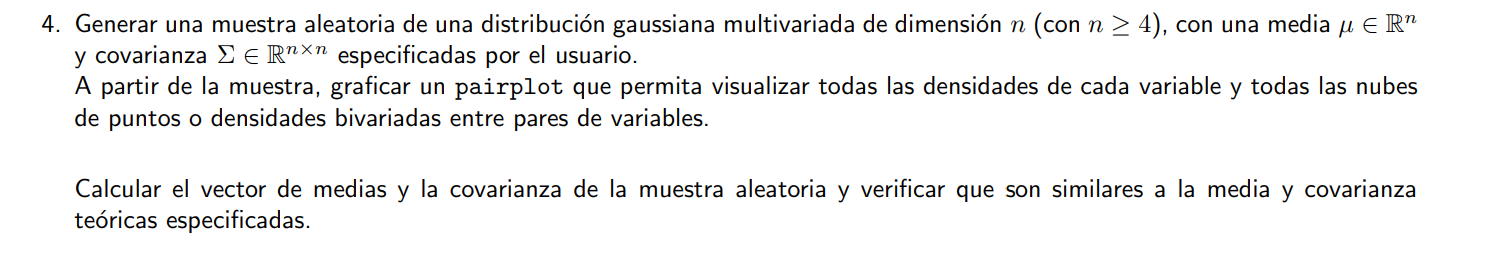


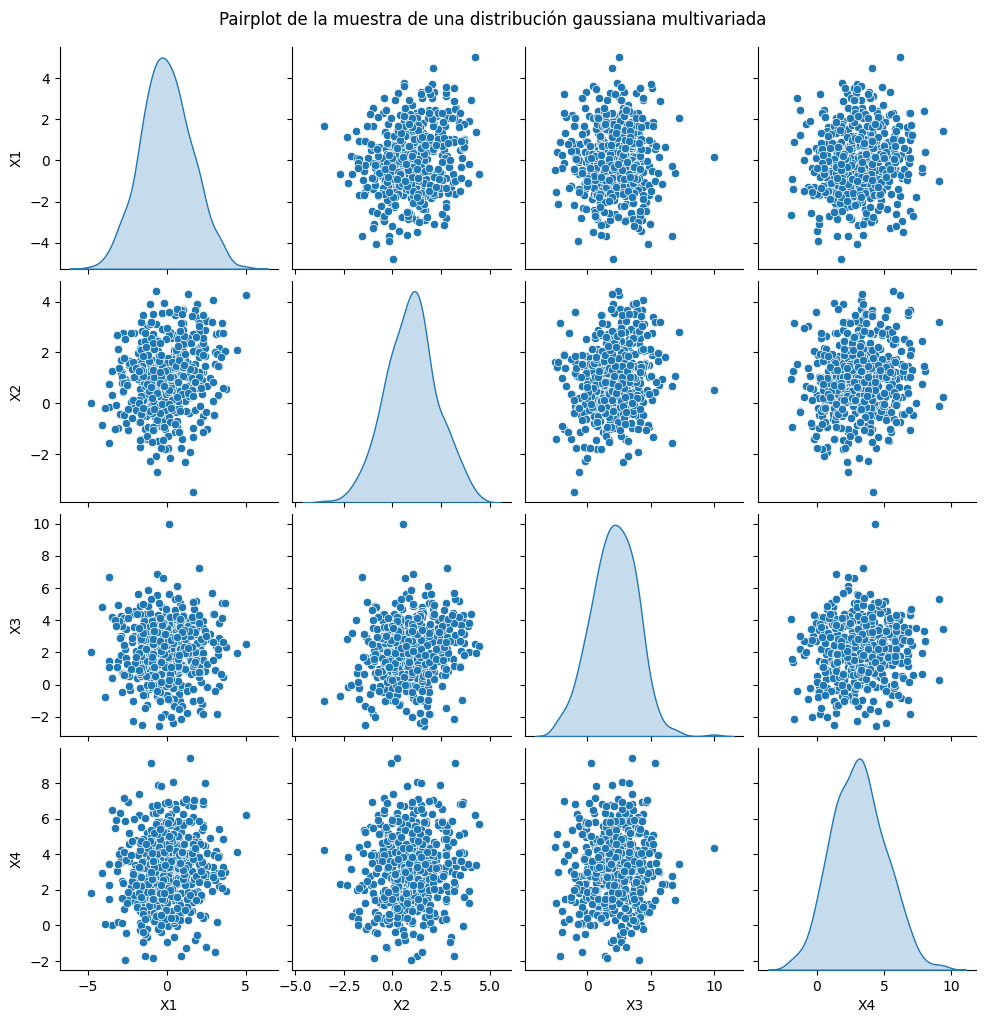

-----------------------------------------------------------------
Resultados de la muestra de una distribución gaussiana multivariada
-----------------------------------------------------------------
Media teórica (μ):
[0 1 2 3]

Media muestral calculada:
[-0.02584399  0.97077641  2.09890955  3.11705445]
-----------------------------------------------------------------
Matriz de covarianza teórica (Σ):
[[2.5 0.5 0.2 0.1]
 [0.5 1.8 0.4 0.3]
 [0.2 0.4 3.2 0.6]
 [0.1 0.3 0.6 4. ]]

Matriz de covarianza muestral calculada:
[[2.53149705 0.4539441  0.02963245 0.25869547]
 [0.4539441  1.73010768 0.41189383 0.30839346]
 [0.02963245 0.41189383 3.16479742 0.21738078]
 [0.25869547 0.30839346 0.21738078 3.95902762]]
-----------------------------------------------------------------
Comparación entre valores teóricos y muestrales
-----------------------------------------------------------------
Diferencia absoluta entre la media teórica y la media muestral:
[0.02584399 0.02922359 0.09890955 0.117054

In [10]:
n = 4

# Definimos una media mu ∈ ℝ^n 
mu = np.array([0, 1, 2, 3])

# Definimos una matriz de covarianza Σ ∈ ℝ^(n×n)
Sigma = np.array([
    [2.5, 0.5, 0.2, 0.1],  
    [0.5, 1.8, 0.4, 0.3],  
    [0.2, 0.4, 3.2, 0.6],  
    [0.1, 0.3, 0.6, 4.0]  
])

# Definimos el tamaño de la muestra
N = 500  

# Generación de la muestra aleatoria de una distribución gaussiana multivariada
muestra = np.random.multivariate_normal(mean=mu, cov=Sigma, size=N)

# Creación de un DataFrame para facilitar la visualización y análisis
columnas = [f'X{i+1}' for i in range(n)]
df = pd.DataFrame(muestra, columns=columnas)

# Graficar el pairplot
# El pairplot muestra en la diagonal las distribuciones univariadas y en las demás posiciones las relaciones bivariadas.
sns.pairplot(df, diag_kind='kde')  
plt.suptitle("Pairplot de la muestra de una distribución gaussiana multivariada", y=1.02)
plt.show()

# Cálculo de la media y la covarianza muestral
media_muestral = df.mean().values
cov_muestral = df.cov().values

print("-----------------------------------------------------------------")
print("Resultados de la muestra de una distribución gaussiana multivariada")
print("-----------------------------------------------------------------")
print("Media teórica (μ):")
print(mu)
print("\nMedia muestral calculada:")
print(media_muestral)
print("-----------------------------------------------------------------")
print("Matriz de covarianza teórica (Σ):")
print(Sigma)
print("\nMatriz de covarianza muestral calculada:")
print(cov_muestral)
# Verificación de similitud entre la media y la covarianza teóricas y muestrales
diferencia_media = np.abs(mu - media_muestral)
diferencia_cov = np.abs(Sigma - cov_muestral)
print("-----------------------------------------------------------------")
print("Comparación entre valores teóricos y muestrales")
print("-----------------------------------------------------------------")
print("Diferencia absoluta entre la media teórica y la media muestral:")
print(diferencia_media)
print("\n -> Un valor cercano a 0 indica que la media muestral se aproxima bien a la teórica.")
print("-----------------------------------------------------------------")
print("Diferencia absoluta entre la matriz de covarianza teórica y la muestral:")
print(diferencia_cov)
print("\n -> Valores cercanos a 0 significan que la muestra mantiene relaciones similares a la distribución teórica.")
print("-----------------------------------------------------------------")



#### Ejercicio 05

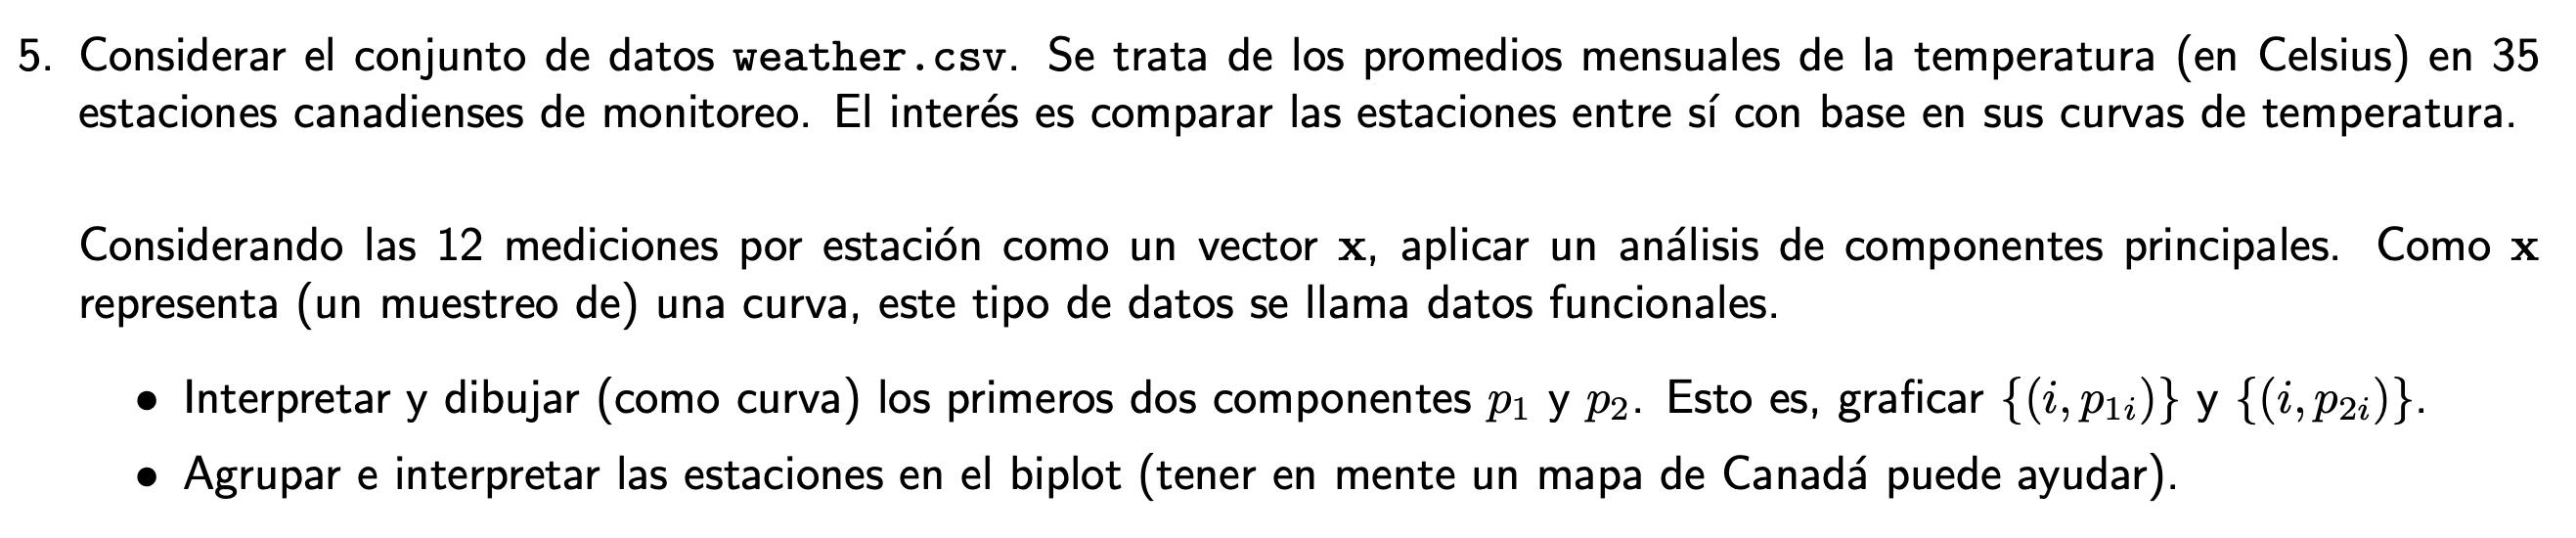

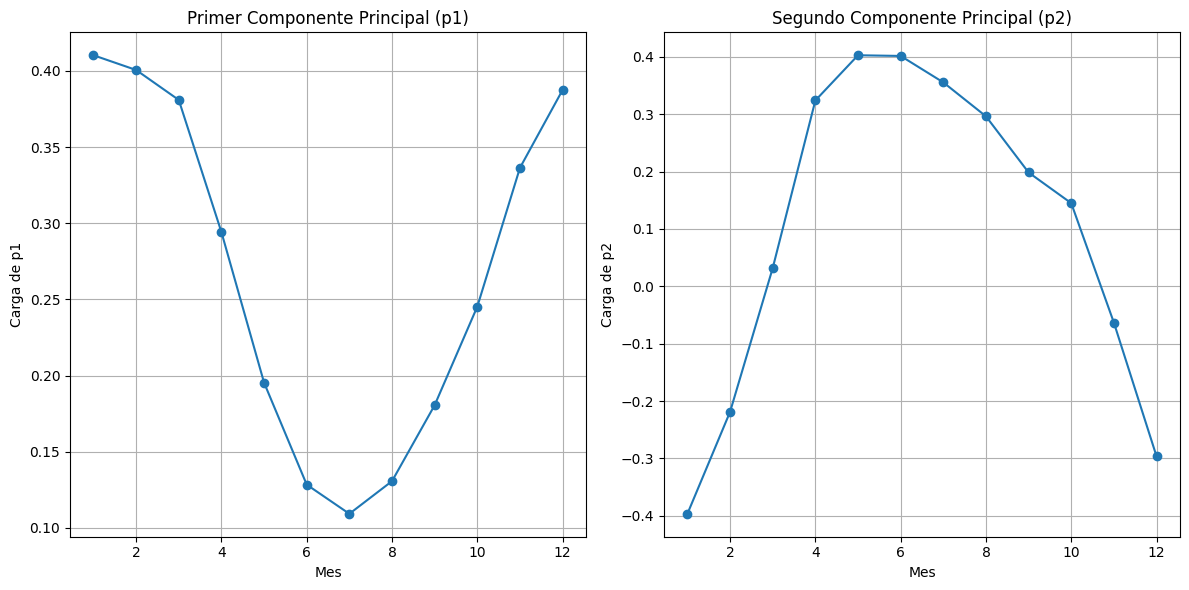

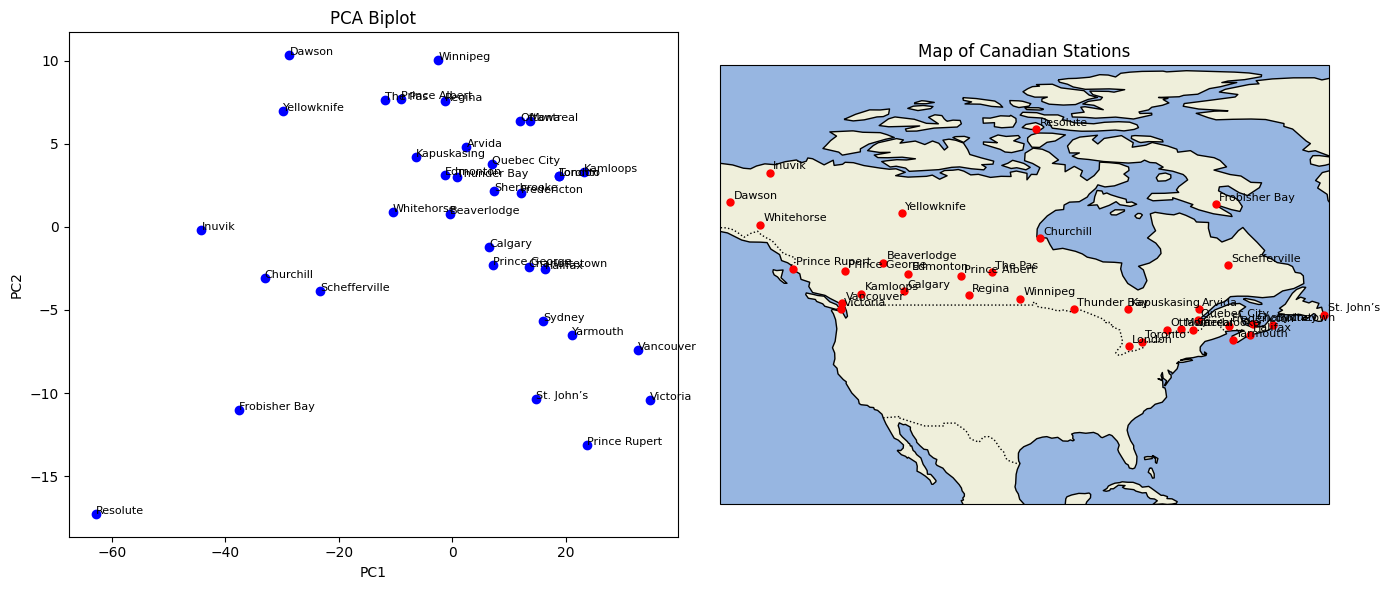

In [28]:
file_path = 'weather.csv'
weather_data = pd.read_csv(file_path)

# Separar los datos de temperatura y las etiquetas de las estaciones
temperature_data = weather_data.drop('station', axis=1).astype(float)
stations = weather_data['station']

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(temperature_data)

# Station coordinates
station_coords = {
    "St. John’s": (47.57, -52.71), "Charlottetown": (46.24, -63.13),
    "Halifax": (44.65, -63.57), "Sydney": (46.14, -60.19),
    "Yarmouth": (43.84, -66.10), "Fredericton": (45.96, -66.64),
    "Arvida": (48.43, -71.00), "Montreal": (45.50, -73.57),
    "Quebec City": (46.81, -71.21), "Schefferville": (54.81, -66.77),
    "Sherbrooke": (45.40, -71.90), "Kapuskasing": (48.42, -81.39),
    "London": (42.98, -81.25), "Ottawa": (45.42, -75.70),
    "Thunder Bay": (48.38, -89.25), "Toronto": (43.65, -79.38),
    "Churchill": (58.77, -94.17), "The Pas": (53.84, -101.24),
    "Winnipeg": (49.90, -97.14), "Prince Albert": (53.20, -105.77),
    "Regina": (50.45, -104.62), "Beaverlodge": (55.16, -117.10),
    "Calgary": (51.05, -114.07), "Edmonton": (53.55, -113.49),
    "Kamloops": (50.67, -120.33), "Prince George": (53.92, -122.75),
    "Prince Rupert": (54.32, -130.32), "Vancouver": (49.28, -123.12),
    "Victoria": (48.43, -123.36), "Dawson": (64.06, -139.43),
    "Whitehorse": (60.72, -135.06), "Frobisher Bay": (63.75, -68.52),
    "Inuvik": (68.36, -133.72), "Resolute": (74.72, -94.80),
    "Yellowknife": (62.45, -114.37)
}

# Graficar los primeros dos componentes principales como curvas
plt.figure(figsize=(12, 6))

# Primer componente principal
plt.subplot(1, 2, 1)
plt.plot(range(1, 13), pca.components_[0], marker='o')
plt.title('Primer Componente Principal (p1)')
plt.xlabel('Mes')
plt.ylabel('Carga de p1')
plt.grid()

# Segundo componente principal
plt.subplot(1, 2, 2)
plt.plot(range(1, 13), pca.components_[1], marker='o')
plt.title('Segundo Componente Principal (p2)')
plt.xlabel('Mes')
plt.ylabel('Carga de p2')
plt.grid()

plt.tight_layout()
plt.show()

# Create figure with PCA biplot and map
fig = plt.figure(figsize=(14, 6))

# PCA Biplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(principal_components[:, 0], principal_components[:, 1], color='blue')
for i, station in enumerate(stations):
    ax1.annotate(station, (principal_components[i, 0], principal_components[i, 1]), fontsize=8)
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_title("PCA Biplot")

# Map of Canada
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.COASTLINE)
ax2.set_extent([-141, -52, 20, 84], crs=ccrs.PlateCarree())

# Plot stations on the map
for station in stations:
    if station in station_coords:
        lat, lon = station_coords[station]
        ax2.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.Geodetic())
        ax2.text(lon + 0.5, lat + 0.5, station, fontsize=8, transform=ccrs.Geodetic())

ax2.set_title("Map of Canadian Stations")

plt.tight_layout()
plt.show()
